 on va faire un apprentissage supervisé --> avec scikit Learn
   Donner à la machine la capacité d'apprendre sans la programmer de façaon explicite
 Développer un modèle mathématiques  à partir de données expérimentales, la machine reçois des données


APPRENTISSAGE SUPERVISÉ

La machine reçois des données caractérisées par des variables(features) et annotées d'une variable y (label) le but c'est que la machine arrive à prédire les y à partir des future

On spécifie quel type de modèle , algorithme d'optimisation (phase d'entrainement) --> Problème de régressioon et classification


Tous les modèles, et tous les algorithmes de machine learning ont déjà été implémentés avec une architecture orientée objet, chaque modèle disposant de sa propre classe. KNN, LinearRegression, Decision Trees, Support vector machines, etc. Pour créer un modèle, on génère un objet de la classe correspondante. Au passage, c’est ce qu’on appelle un estimateur (dans sklearn) On peut aussi préciser entre parenthèse les hyper-paramètres de notre modèle. Par exemple, le learning rate d’une descente de gradient, ou bien le nombre d’arbres dans une Random Forest. Une fois qu’on a initialisé notre modèle, on va pouvoir entraîner, l’évaluer, et l’utiliser grâce a trois méthodes qu’on retrouve dans toutes les classes de Sklearn. Ce sont les méthodes Fit, score et predict.

1-) Sélectionner un estimateur et préciser ses hyperparamètres : model_Objet = LinearRegression_constructeur (......)_hyperparamètres
2-) Entrainer le modèle sur les données X,y (divisées en deux tableaux Numpy)
model.fit(X,y)
3-) Evaluer le modèle model.score(X,y)
4-) Utiliser le modèle : model.predict(X)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1-) Regression avec SKLearn

In [2]:
np.random.seed(0)
m=100
X=np.linspace(0,10,m).reshape(m,1)
y=X+np.random.randn(m,1)

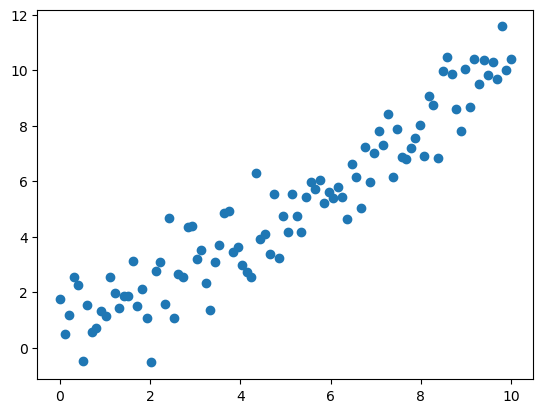

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.linear_model import LinearRegression

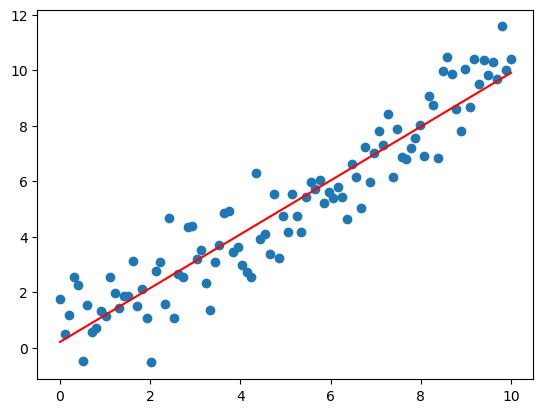

In [5]:
model=LinearRegression() # vu note dataset on utilise un estimateur comme LinearRegression()
model.fit(X,y) # on entraine le modèle
model.score(X,y) # Ici on fait l'évaluation du modèle c'est à dire le coefficient de 
# détermination

predictions=model.predict(X)

plt.scatter(X,y)
plt.plot(X,predictions,c='r')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


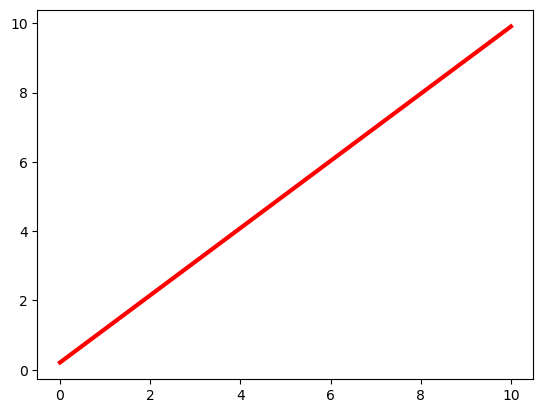

In [6]:
#  un modèle de support Vector machine SVM

from sklearn.svm import SVR

model = SVR(C=100)
model.fit(X,y)
model.score(X,y)

prdictions=model.predict(X)
plt.plot(X, predictions, c='r',lw=3)

# UN PROBLEME DE CLASSIFICATION

In [7]:
import pandas as pd

In [8]:
titanic= pd.read_excel('titanic.xls')
titanic.head()
titanic.shape

(1309, 14)

In [9]:
titanic = titanic[['survived', 'pclass', 'sex', 'age']] # On choisit les colonnes que l'on veut garder pour notre étude
titanic.dropna(axis=0, inplace=True) # Supprimer les lignes qui ont des valeurs manquantes
titanic['sex'] = titanic['sex'].replace({'male': 0, 'female': 1}) # Utiliser un dictionnaire pour remplacer les valeurs de 'sex' en valeurs numériques
titanic.head()


C:\Users\genie\AppData\Local\Temp\ipykernel_960\980404200.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['sex'] = titanic['sex'].replace({'male': 0, 'female': 1}) # Utiliser un dictionnaire pour remplacer les valeurs de 'sex' en valeurs numériques


,survived,pclass,sex,age
0,1,1,1,29.0000
1,1,1,0,0.9167
2,0,1,1,2.0000
3,0,1,0,30.0000
4,0,1,1,25.0000


In [10]:
# un modèle de classification
# chargeons un modèle de classification
from sklearn.neighbors import KNeighborsClassifier

In [11]:
model = KNeighborsClassifier(n_neighbors=5) # 0-10 le model selection avec des boucles for et if

In [12]:
# divisons
y=titanic['survived']
X=titanic.drop('survived',axis=1)

In [13]:
model.fit(X,y)
model.score(X,y)

0.8317399617590823

In [14]:
model.predict(X)

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [15]:
def survie(model,pclass=3,sex=0,age=20):
    x=np.array([pclass,sex,age]).reshape(1,3)
    print(model.predict(x))
    print(model.predict_proba(x))

In [16]:
survie(model)

[0]
[[0.6 0.4]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# MODEL SELECTION : train_test_split, Cross Validation, GridSearchCV

# Train_test_validation 
il ne faut jamais évaluer la performance d'un modèle avec les mêmes données qui ont servi à l'entraîner
On divise toujours notre dataset en deux partie , 80 pour le train_test et 20 dans l'évaluation

In [17]:
from sklearn.datasets import load_iris # importons le dataset de la feuillle d'iris

In [18]:
iris = load_iris()

(150, 4)


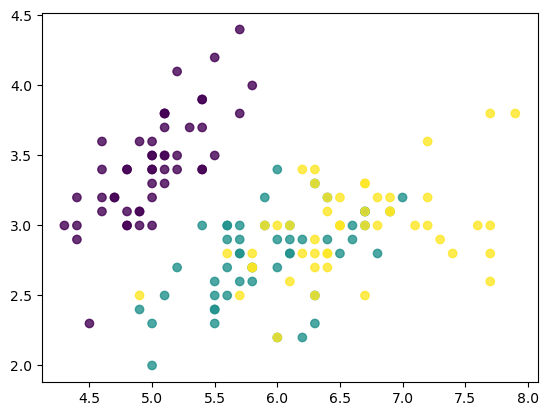

In [19]:
X= iris.data
y=iris.target

print(X.shape)
plt.scatter(X[:,0],X[:,1],c=y,alpha=0.8)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=5) # test_size déiniit 
# le pourcentage de données X_test,y_test on peut utiliser aussi train_size
# on peut fixer l'aléatoire avec l'argument random_state=5
print('Train set : ',X_train.shape)
print('Test set: ',X_test.shape)

Train set :  (120, 4)
Test set:  (30, 4)


Text(0.5, 1.0, 'Test set')

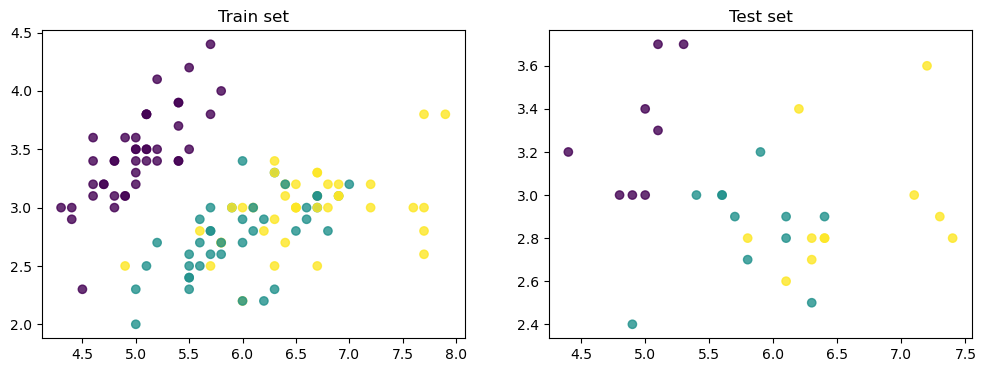

In [21]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train, alpha =0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:,0],X_test[:,1], c=y_test, alpha=0.8)
plt.title('Test set')

In [22]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
print('Train Score: ',model.score(X_train,y_train))
print('Train score', model.score(X_test,y_test))

Train Score:  0.975
Train score 0.9333333333333333


Pour évaluer un modèle il faut le soumettre 
Pour cette raison on coupe une troisième partie appelée Validation Set ( train set , validation set , test set)

--> La cross validation 
 Amélioration des hyperparamètres 

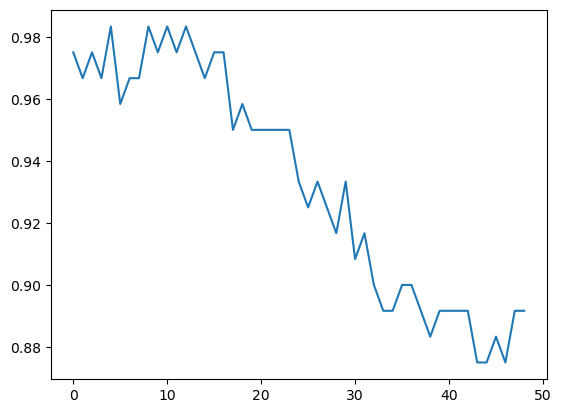

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

L = []  # Initialiser la liste en dehors de la boucle

for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5, scoring='accuracy').mean()
    L.append(score)  # Ajouter le score à la liste

# print(L)  # Afficher la liste des scores

plt.plot(L)


# VALIDATION CURVE
La fonction validation curve permet de tester toutes les valeurs pour un hyper Paramètre donné . Clacule le score sur Train set et valset grâce à la Cross Validation 

In [24]:
from sklearn.model_selection import validation_curve

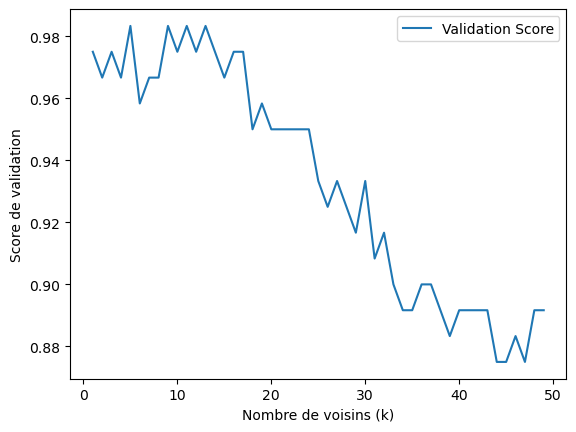

In [25]:
# Modèle
model = KNeighborsClassifier()

# Valeurs de k à tester
k_values = np.arange(1, 50)

# Validation curve
train_score, val_score = validation_curve(
    model, X_train, y_train,
    param_name="n_neighbors",  # Paramètre à faire varier
    param_range=k_values,      # Liste des valeurs à tester
    cv=5,                      # Cross-validation à 5 folds
    scoring="accuracy"         # Optionnel : score utilisé
)

# Moyenne des scores de validation
mean_val_score = val_score.mean(axis=1)

# Tracer la courbe
plt.plot(k_values, mean_val_score, label="Validation Score")
plt.xlabel("Nombre de voisins (k)")
plt.ylabel("Score de validation")
plt.legend()
plt.show()


# GridSearchCV 
grid = GridSearchCV(model,param_grid,cv)

--> construit une grille de modèles avec toutes les combinaisons d'hyperparamètres présents dans param_grid

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid = {'n_neighbors': np.arange(1,20),'metric':['euclidean','manhattan']}
grid= GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [28]:
grid.best_score_ # pour voir le meilleur score

0.9833333333333334

In [29]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [30]:
grid.best_estimator_

KNeighborsClassifier(metric='euclidean')

In [31]:
model=grid.best_estimator_
model.score(X_test, y_test)

0.9333333333333333

# La fonction confusion matrix
- Outil de mesure très utilepour évaluer la qualité d'un modèle de classification
- Montre les erreurs de classement
La fonction confusion_matrix() de scikit-learn permet d’évaluer la performance d’un modèle de classification en comparant les prédictions aux vraies valeurs.

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]], dtype=int64)

# LES TECHNIQUES DE CROSS VALIDATION 
  CROSS VALIDATION SKLEARN PYTHON

L'argument shuffle pour mélanger les données avant de découper les données
La technique de cross validation ( inutile en deep learning)

In [34]:
# Le K Fold -->
from sklearn.model_selection import KFold

In [36]:
cv=KFold(5)
cross_val_score(KNeighborsClassifier(),X,y,cv=cv)

array([1.        , 1.        , 0.83333333, 0.93333333, 0.8       ])